# ANLY-590 Assignment 2
### Yue Han

### Problem 1. Feedforward: Building a ReLU Neural Network
#### 1) Draw a network with:

![title](network.jpeg)

#### 2) Write out the mathematical equation for the output of this network


$$h_1 = h(x_1*w_{11}+x_2*w_{21}+b_{1})$$
$$h_2 = h(x_1*w_{12}+x_2*w_{22}+b_{2})$$
$$h_3 = h(x_1*w_{13}+x_2*w_{23}+b_{3})$$

$$\begin{aligned}
 y &= \theta(h_1*v_1+h_2*v_2+h_3*v_3+b_y) \\
 &= \theta(h(x_1*w_{11}+x_2*w_{21}+b_{1})*v_1+ \\
 &\space\space\space\space\space\space\space\space\space \theta(x_1*w_{12}+x_2*w_{22}+b_{2})*v_2+\\
 &\space\space\space\space\space\space\space\space\space \theta(x_1*w_{13}+x_2*w_{23}+b_{3})*v_3+b_y)
\end{aligned}$$

where $h(x)$ is the ReLU activation function, and $\theta(x)$ is the sigmoid activation function.

#### 3) Write out the forward-pass function in python.

In [1]:
import numpy as np

#helper avtivation function
#sigmond function 
def sigmoid(x):    
    return 1 / (1 + np.exp(-x))

#ReLU function
def ReLU(x):    
    return np.maximum(x,0)

#forward-pass function
def ff_nn_ReLu(x, w, v, b, c):
    h = ReLU(np.dot(x,w) + b)
    y = sigmoid(np.dot(h,v) + c)
    return np.array(y)

#### 4) What are the class probabilities associated with the forward pass of each sample?

In [2]:
W = np.array([[1, -1, 0],[0, 0, 1/2]])
b = np.array([0, 0, 1])
v = np.array([1, 0, -1])
c = 1
X = np.array([[1, -1],[0, -1],[0, 1]])

result = ff_nn_ReLu(X, W, v, b, c)

print('The class probabilities associated with the forward pass of each sample are: ')
print(result)

The class probabilities associated with the forward pass of each sample are: 
[0.81757448 0.62245933 0.37754067]


### Problem 2. Gradient Descent

Consider a simple non-convex function of two variables:
$$f(x,y) = (1-x^3)+100*(y^2-x)^2$$

#### 1) What are the partial derivatives of f with respect to x and to y?

$$\frac{\partial}{\partial x}((1-x^3)+100*(y^2-x)^2) = -3x^2+200x-200y^2$$

$$\frac{\partial}{\partial y}((1-x^3)+100*(y^2-x)^2) = 400y^3-400xy$$

#### 2) Create a visualization of the contours of the Rosenbrock function.

In [3]:
import matplotlib.pyplot as plt

#Rosenbrock's banana function: f(x,y)=(1-x^3)+100(y^2-x)^2
def rosenbrock(x,y):
    return (1 - x**3) + 100*(y**2 - x)**2

Text(0,0.5,'y')

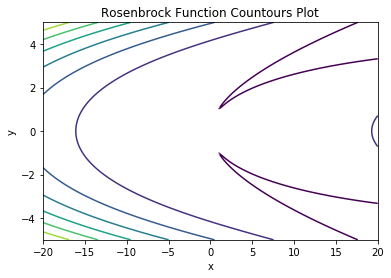

In [4]:
delta = 250
x = np.linspace(-20, 20, delta)
y = np.linspace(-5, 5, delta)
X, Y = np.meshgrid(x, y)

Z = rosenbrock(X, Y)
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)

plt.title('Rosenbrock Function Countours Plot')
plt.xlabel('x')
plt.ylabel('y')

#### 3) Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [5]:
#Gradient Descent function
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+200*x-200*y**2
    df_dy = 400*y**3-400*x*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=0.1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

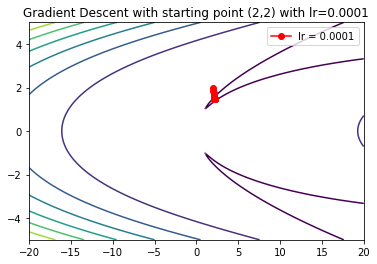

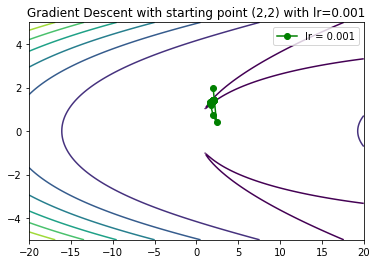

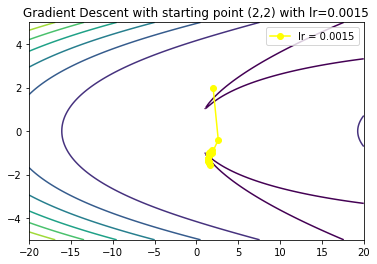

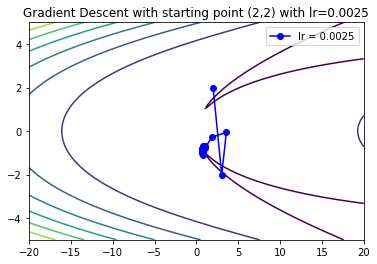

In [6]:
#Choose the learning rates of 0.0001, 0.001, 0.0015 and 0.0025
#plot for each learning rate
lr = [0.0001, 0.001, 0.0015, 0.0025]
colors = ['red', 'green', 'yellow','blue']

for i in range(4):
    traj = grad_descent(starting_point=[2,2], iterations=50, learning_rate=lr[i])

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x = traj[:,0]
    y = traj[:,1]
    
    plt.plot(x, y, '-o', color=colors[i], label='lr = ' + str(lr[i]))
    plt.title('Gradient Descent with starting point (2,2) with lr=' + str(lr[i]))
    plt.legend()
    plt.show()

I tried four different learning rate, and find out that the larger the learning rate, the bigger the moving step. 

#### 4) Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.


In [7]:
#Gradient Descent with Momentum function
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
        trajectory = [point]
        v = np.zeros(len(point))
    else:
        point = np.random.uniform(-10,10, size=2)
        trajectory = [point]
        v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

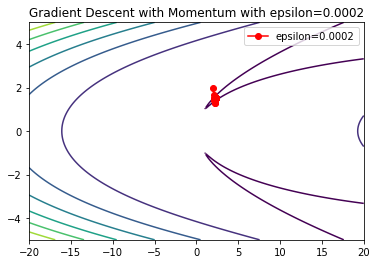

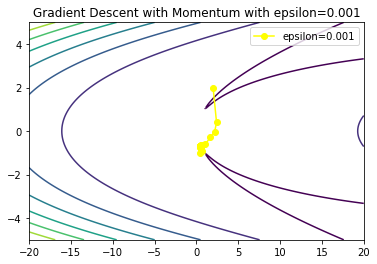

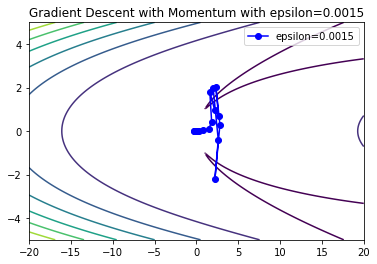

In [8]:
#set algorithm’s hyperparameters with three different epsilon 
#equal to 0.0002, 0.0010 and 0.0015 respectively
epsilons = [0.0002, 0.0010, 0.0015]
colors = ['red', 'yellow', 'blue']

for i in range(3):
    traj_eps = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=epsilons[i], alpha=.5)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x_eps = traj_eps[:,0]
    y_eps = traj_eps[:,1]

    plt.plot(x_eps, y_eps, '-o', color = colors[i], label = 'epsilon=' + str(epsilons[i]))
    plt.title('Gradient Descent with Momentum with epsilon=' + str(epsilons[i]))
    plt.legend()
    plt.show()

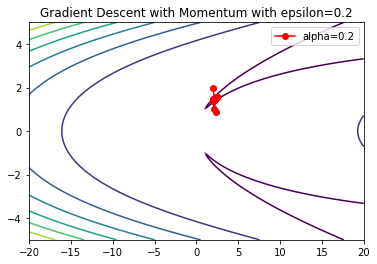

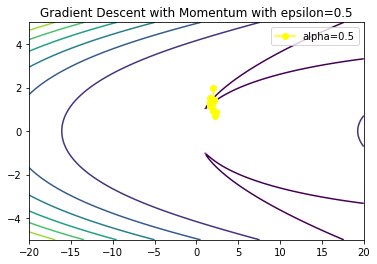

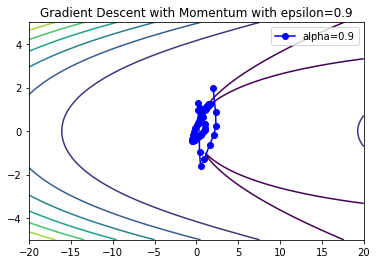

In [9]:
#set algorithm’s hyperparameters with three different alphas 
#equal to 0.2, 0.5 and 0.9 respectively
alphas = [0.2, 0.5, 0.9]
colors = ['red', 'yellow', 'blue']

for i in range(3):
    traj_eps = grad_descent_with_momentum(starting_point=[2,2], iterations=50, epsilon=0.0007, alpha=alphas[i])

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x_eps = traj_eps[:,0]
    y_eps = traj_eps[:,1]

    plt.plot(x_eps, y_eps, '-o', color = colors[i], label = 'alpha=' + str(alphas[i]))
    plt.title('Gradient Descent with Momentum with epsilon=' + str(alphas[i]))
    plt.legend()
    plt.show()

### Problem 3. Backprop
#### 1) For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

There are 13 free parameters in this model, with ReLU activation function for the hidden layer and sigmond as activation for the output layer. Therefore, we use binary cross-entropy for the loss function: $L = -y_i log(\hat y_i) - (1-y_i)log(1-\hat y_i)$

We begin with computing the mathematical equation for the output of this network:
$$in_1 = x_1w_{11} + x_2w_{21} + b_1$$ 
$$out_1 = ReLU(in_1)$$

$$in_2 = x_1w_{12} + x_2w_{22} + b_2$$
$$out_2 = ReLU(in_2)$$

$$in_3 = x_1w_{13} + x_2w_{23} + b_3$$
$$out_3 = ReLU(in_3)$$

$$\hat y = Sigmoid(v_1out_1 + v_2out_2 + v_3out_3 + b_y)$$

By the sigmoid function $$\sigma(x) = \frac{1}{1+e^{-x}}$$
$$\frac{d}{dx} \sigma(x) = \sigma(x)(1-\sigma(x))$$

and the RelU function $$ReLU(x) = max(0,x)$$
$$\frac{d}{dx} max(0,x) = \left\{
                \begin{array}{ll}
                      0  if x<0 \\
                      1  if x>0
                \end{array}
              \right.$$
              
and $$L = -y_i log(\hat y_i) - (1-y_i)log(1-\hat y_i)$$
$$\frac{dL}{d \hat y_i} = -(\frac{y_i}{\hat y_i} - \frac{1-y_i}{1-\hat y_i})$$

So to each of the model parameters, we have
$$\frac{\partial L}{\partial b_y} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial b_y} =  -(\frac{y_i}{\hat y_i} - \frac{1-y_i}{1-\hat y_i}) (\hat y_i (1 - \hat y_i))$$

$$\frac{\partial L}{\partial v_1} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial v_1} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i)) out_1$$

$$\frac{\partial L}{\partial v_2} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial v_2} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i)) out_2$$

$$\frac{\partial L}{\partial v_3} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial v_3} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i)) out_3$$

$$\frac{\partial L}{\partial b_1} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_1}\frac{dout_1}{din_1}\frac{\partial in_1}{\partial b_1} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_1\frac{\partial}{\partial in_1}ReLU(in_1)$$

$$\frac{\partial L}{\partial b_2} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_2}\frac{dout_2}{din_2}\frac{\partial in_2}{\partial b_2} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_2\frac{\partial}{\partial in_2}ReLU(in_2)$$

$$\frac{\partial L}{\partial b_3} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_3}\frac{dout_3}{din_3}\frac{\partial in_3}{\partial b_3} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_3\frac{\partial}{\partial in_3}ReLU(in_3)$$


$$\frac{\partial L}{\partial w_{11}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_1}\frac{dout_1}{din_1}\frac{\partial in_1}{\partial w_{11}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_1\frac{\partial}{\partial in_1}ReLU(in_1)x_1$$

$$\frac{\partial L}{\partial w_{21}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_1}\frac{dout_1}{din_1}\frac{\partial in_1}{\partial w_{21}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_1\frac{\partial}{\partial in_1}ReLU(in_1)x_2$$


$$\frac{\partial L}{\partial w_{12}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_2}\frac{dout_2}{din_2}\frac{\partial in_2}{\partial w_{12}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_2\frac{\partial}{\partial in_2}ReLU(in_2)x_1$$

$$\frac{\partial L}{\partial w_{22}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_2}\frac{dout_2}{din_2}\frac{\partial in_2}{\partial w_{22}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_2\frac{\partial}{\partial in_2}ReLU(in_2)x_2$$

$$\frac{\partial L}{\partial w_{13}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_3}\frac{dout_3}{din_3}\frac{\partial in_3}{\partial w_{13}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_3\frac{\partial}{\partial in_3}ReLU(in_3)x_1$$

$$\frac{\partial L}{\partial w_{23}} = \frac{dL}{d \hat y_i} \frac{\partial \hat y_i}{\partial out_3}\frac{dout_3}{din_3}\frac{\partial in_3}{\partial w_{23}} = \frac{dL}{d \hat y_i}(\hat y_i (1 - \hat y_i))v_3\frac{\partial}{\partial in_3}ReLU(in_3)x_2$$


#### 2) Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [10]:
#helper functions
def loss_function(y, y_pred):
    total = y * np.log(y_pred)+(1-y)*np.log(1-y_pred) # Binary cross entropy
    return -total.sum()

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def randomized_weights_bias():
    W = np.random.randn(6).reshape(2,3)
    V = np.random.randn(3).reshape(3,1)
    b = np.random.randn(3).reshape(1,3)
    b_y = np.random.randn(1)
    return (W, V, b, b_y)

# Function grad_f() compute gradient for cross entropy loss on binary classification
def grad_f(x, y, params):
    W, V, b, b_y = params
    a = np.dot(x, W) + b
    h = ReLU(a)
    y_hat = sigmoid(np.dot(h, V) + b_y)
    
    dL_dby = (y_hat-y).sum()
    dL_dv = h.T.dot(y_hat-y)
    dL_db =((y_hat-y).dot(V.T)*relu_derivative(a)).sum(axis=0)
    dL_dw = x.T.dot((y_hat-y).dot(V.T)*relu_derivative(a))
    return (dL_dw, dL_dv, dL_db, dL_dby)

#### 3) Generate a synthetic dataset like the XOR pattern.

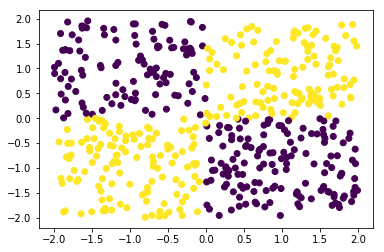

In [21]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros((500,1))
y[np.logical_and(x[:,0]>0, x[:,1]>0)] = 1
y[np.logical_and(x[:,0]<0, x[:,1]<0)] = 1
plt.scatter(x[:,0],x[:,1],c=y[:,0])

#### 4) Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [12]:
#helper funtion to computer y_hat. 
def y_predict(x, params):
    W, V, b, b_y = params
    h = ReLU(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + b_y) # binary classification
    return y

In [22]:
def grad_descent_xor(x, y, starting_point=None, iterations=10, learning_rate=1e-1):
    point = starting_point
    trajectory = [point]
    losses = [loss_function(y, y_predict(x, point))]
    
    for i in range(iterations):
        grads = grad_f(x, y, point)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss_function(y, y_predict(x, point)))
    return (np.array(trajectory), losses)

In [23]:
#fit xor network to gradient descent
traj, losses = grad_descent_xor(x, y, starting_point=randomized_weights_bias(), iterations=100, learning_rate=1e-3)

Text(0,0.5,'Total Loss')

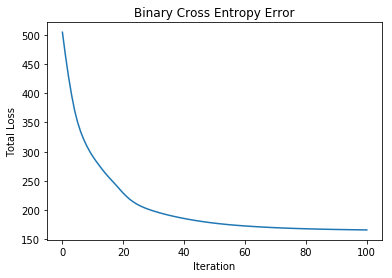

In [15]:
#plot the result
plt.plot(losses)
plt.title('Binary Cross Entropy Error')
plt.xlabel('Iteration')
plt.ylabel('Total Loss')

#### 5) Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [24]:
#function to computer gradient descent with momentum
def grad_descent_with_momentum_xor(x, y, starting_point, iterations=10, epsilon=1e-2, alpha=0.001):
    point = starting_point 
    trajectory = [point]
    losses = [loss_function(y, y_predict(x, point))]
    vs = np.zeros(len(starting_point))
    
    for i in range(iterations):
        grads = grad_f(x,y,point)
        update = []  
        for (matrix, grad, v) in zip(point, grads, vs):
            update.append(matrix - epsilon*grad-alpha*v)
        
        vs = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss_function(y, y_predict(x, point)))
        
    return (np.array(trajectory), losses)

In [25]:
# fit in the network to gradient descent with momentum
traj_momentum, losses_momentum = grad_descent_with_momentum_xor(x, y, starting_point=randomized_weights_bias(), iterations=100, epsilon=3e-3, alpha=0.00001)

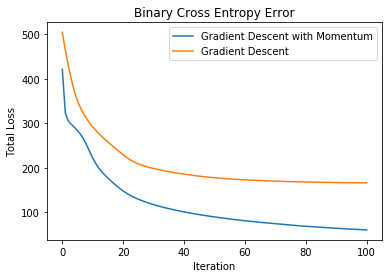

In [18]:
#plot the comparing result
plt.plot(losses_momentum, label = "Gradient Descent with Momentum")
plt.plot(losses, label = "Gradient Descent")

plt.title('Binary Cross Entropy Error')
plt.xlabel('Iteration')
plt.ylabel('Total Loss')
plt.legend(loc = "upper right")

By comparing the two plots above, we can see that gradient descent with momentum does converges more efficiently than the normal gradient descent. 

#### 6) Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

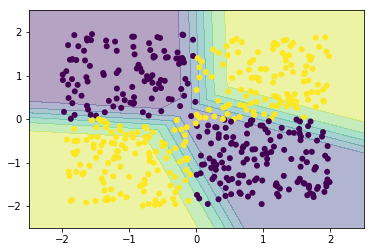

In [26]:
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
labels = y_predict(np.c_[xx.ravel(), yy.ravel()], traj[-1])
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
# Get predicted labels on training data and plot
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()